In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import kuramoto
import random
from kuramoto import Kuramoto, plot_phase_coherence, plot_activity
from scipy.io import savemat, loadmat

In [2]:
num_comm = 2
comm_size = 128
intra_con = comm_size - 1
intra_coupling = 0.64
inter_coupling = 0.4
inter_con = comm_size
p = 0.2

In [3]:
def communities_mat(num_comm, comm_size):
    graph = nx.caveman_graph(num_comm, comm_size)
    A = nx.to_numpy_array(graph)
    return A

In [4]:
adj_mat = communities_mat(num_comm, comm_size)

In [5]:
def intra_cc(A, intra_coupling):
    A[A == 1] = intra_coupling
    return A

In [6]:
adj_mat = intra_cc(adj_mat, intra_coupling)

In [7]:
def extra_connections(A, inter_coupling, p):
    s = A.shape
    for i in range(1, s[0]):
        for j in range(0, i):
            if A[i,j] == 0:
                k = np.random.rand()
                if k <= p:
                    A[i, j] = inter_coupling
                    A[j, i] = inter_coupling           
    return A

In [8]:
adj_mat = extra_connections(adj_mat,inter_coupling, p)

In [10]:
dict = {'adj_mat' : adj_mat}

In [31]:
num_comm = 2
comm_size = 128
intra_con = comm_size - 1
intra_coupling = 0.7
inter_coupling = 0.3
inter_con = comm_size
p = 1

In [32]:
adj_mat = communities_mat(num_comm, comm_size)
adj_mat = intra_cc(adj_mat, intra_coupling)
adj_mat = extra_connections(adj_mat,inter_coupling, p)

In [34]:
dict = {'a' : adj_mat}

In [35]:
savemat('comm128', dict)

In [26]:
adj_mat

array([[0. , 0.9, 0.9, ..., 0.1, 0.1, 0.1],
       [0.9, 0. , 0.9, ..., 0.1, 0.1, 0.1],
       [0.9, 0.9, 0. , ..., 0.1, 0.1, 0.1],
       ...,
       [0.1, 0.1, 0.1, ..., 0. , 0.9, 0.9],
       [0.1, 0.1, 0.1, ..., 0.9, 0. , 0.9],
       [0.1, 0.1, 0.1, ..., 0.9, 0.9, 0. ]])

<Axes: xlabel='Time', ylabel='Order parameter'>

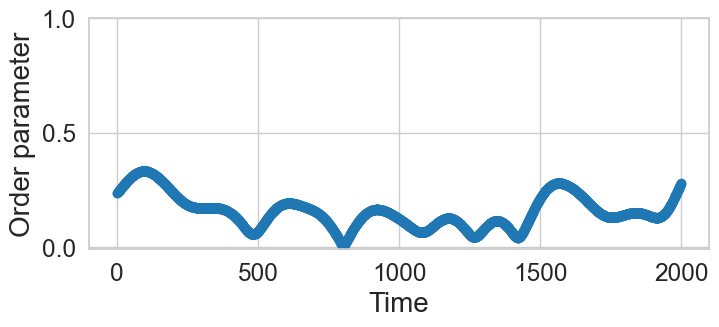

In [91]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.6)
model = Kuramoto(coupling=0.6, dt=0.01, T=20, n_nodes=len(adj_mat), phase_lag = np.pi*(1/3-1/18))

activity = model.run(adj_mat=adj_mat)

plot_phase_coherence(activity[0:32, :])

<Axes: xlabel='Time', ylabel='Order parameter'>

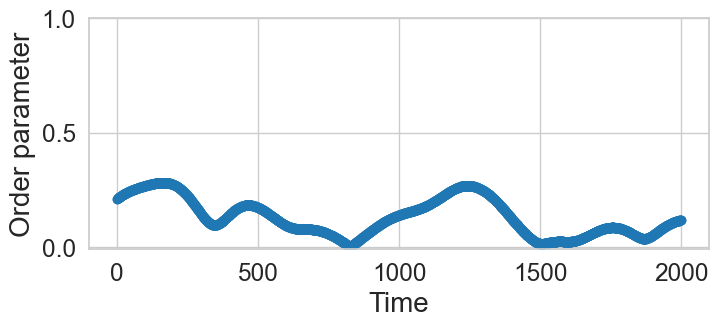

In [92]:
plot_phase_coherence(activity[32:64, :])

<Axes: xlabel='Time', ylabel='Order parameter'>

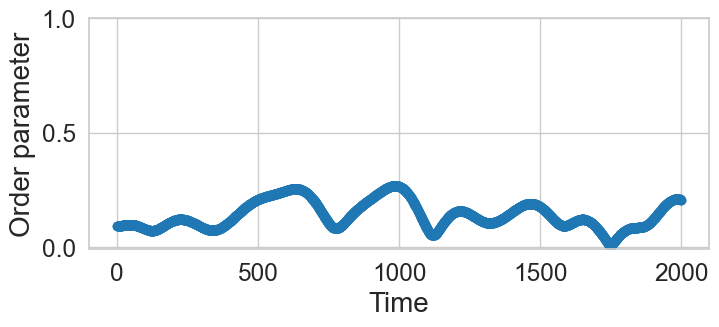

In [93]:
plot_phase_coherence(activity[64:96, :])

<Axes: xlabel='Time', ylabel='Order parameter'>

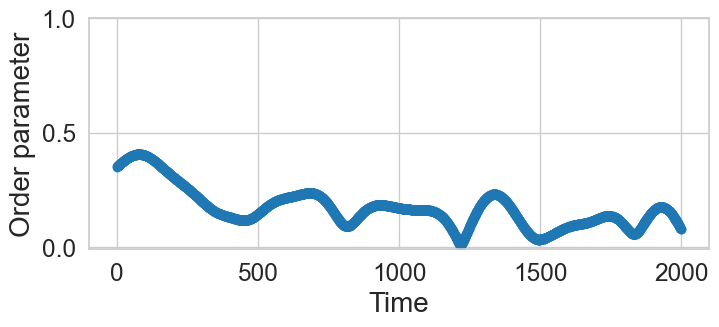

In [94]:
plot_phase_coherence(activity[96:128, :])

<Axes: xlabel='Time', ylabel='Order parameter'>

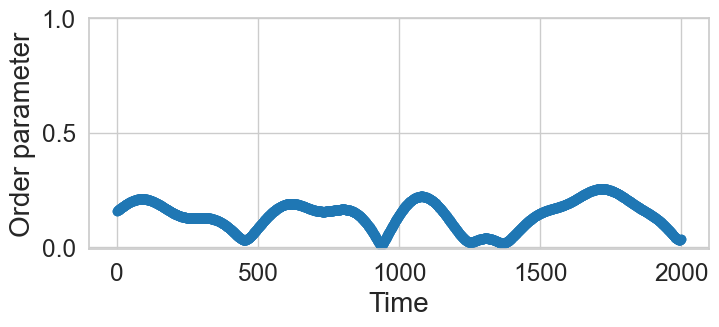

In [95]:
plot_phase_coherence(activity[128:160, :])

<Axes: xlabel='Time', ylabel='Order parameter'>

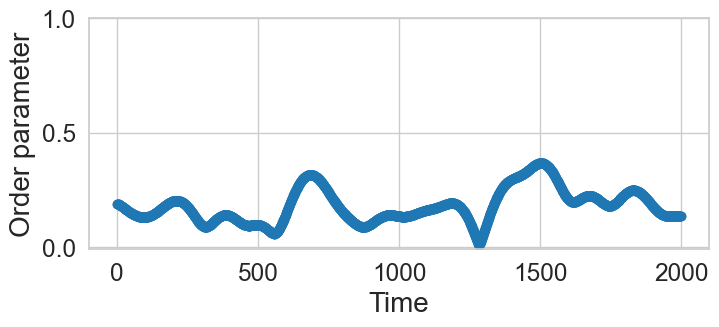

In [96]:
plot_phase_coherence(activity[160:192, :])

<Axes: xlabel='Time', ylabel='Order parameter'>

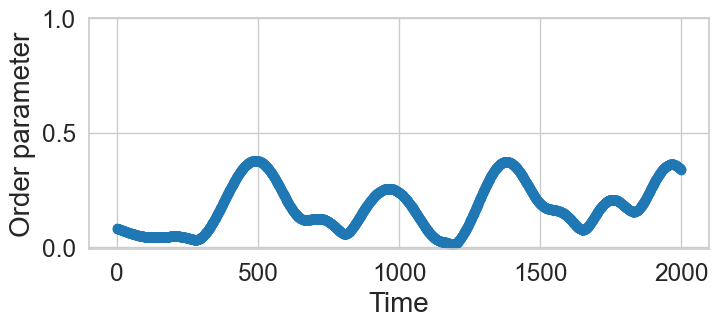

In [97]:
plot_phase_coherence(activity[192:224, :])

<Axes: xlabel='Time', ylabel='Order parameter'>

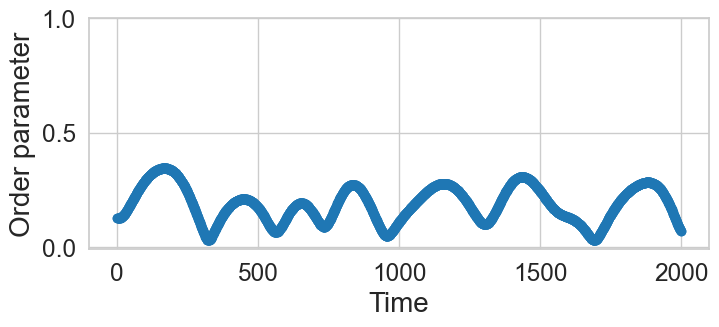

In [98]:
plot_phase_coherence(activity[224:256, :])

In [65]:
# def extra_connections(A, inter_con, inter_coupling, intra_coupling, comm_size, num_comm):
#     s = A.shape
#     t = (comm_size-1)*intra_coupling + inter_con*inter_coupling
#     list = np.linspace(0, num_comm*comm_size - 1, num_comm*comm_size).astype('int')
#     rand_counts = []
#     for i in range(0, s[0]):
#         z = np.sum(A, axis = 0)[i]
#         list = np.delete(list, np.where(list == i))
#         while z < t:
#             k = random.choice(list)
#             if A[i, k] == 0:
#                 A[i, k] = inter_coupling
#                 A[k, i] = inter_coupling
#                 z += inter_coupling
#                 rand_counts.append(k)
#                 if rand_counts.count(k) == inter_con:
#                     rand_counts.remove(k)
#                     list = np.delete(list, np.where(list == k))
#     return A

In [ ]:
# adj_mat = mult_comm(adj_mat, inter_coupling, inter_con, p)
# np.sum(adj_mat, axis = 0)

In [18]:
# def inter_comm_coupling(A, inter_coupling, p, q):
#     s = A.shape
#     z = p + q
#     for i in range(0, s[0] - 1):
#         n = np.sum(A, axis = 0)[i]
#         while n < z:
#             k = np.random.randint(0, s[0])
#             if (k != i):
#                 if A[i, k] == 0:
#                     if np.sum(A, axis = 0)[k] < z:
#                         A[i, k] = inter_coupling
#                         A[k, i] = inter_coupling
#                         n += inter_coupling
#     return A

In [9]:
# def mult_comm(A, inter_coupling, inter_con, p):
#     for i in range(1, inter_con):
#         q = i*inter_coupling
#         A = inter_comm_coupling(A, inter_coupling, p, q)
#     return A